In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from data_preprocessing.tools import clustering, plot_group_counts, plot_tokens_history

In [ ]:
df = pd.read_csv("data/ClosePriceData_2022-10-01_to_2022-08-21.csv", index_col=0)
df.drop(columns=["TUSD", "BUSD"], inplace=True)

df.sort_index(inplace=True)

df_change = df/df.iloc[0]-1
df_daily_roi = df.pct_change().dropna()

print("df shape:", df.shape)
df.head()

In [ ]:
plot_tokens_history(data=df_change, title="Initial Tokens", columns=None)

In [ ]:
data = df_daily_roi.T.values.astype(np.float64)

In [ ]:
from data_preprocessing.tools import dim_reduction_pca, plot_components

df_red = np.asanyarray(dim_reduction_pca(df=data, var_th=0.90, show_variance=True), dtype=np.float64)

In [ ]:
search_grid = {
    "OPTICS": {"min_samples": [2, 3, 5, 7, 10]},
    "DBSCAN": {"min_samples": [2, 3, 5, 7, 10]}
}
search_grid

In [ ]:
results, tsne_data = clustering(data=df_red, grid=search_grid)
plt.show()

In [ ]:
plot_group_counts(results, "OPTICS: min_s = 2")
plot_group_counts(results, "OPTICS: min_s = 3")

In [ ]:
try:
    tokens_op2 = df.columns[results["OPTICS: min_s = 2"] != -1].drop("TUSD").drop("BUSD")
except:
    print("BUSD or TUSD not in options")
    
try:
    tokens_op3 = df.columns[results["OPTICS: min_s = 3"] != -1].drop("BUSD").drop("TUSD")
except:
    print("BUSD or TUSD not in options")

In [ ]:
tokens_op2

In [ ]:
plot_tokens_history(data=df_change, title="Options for Portfolio 1", columns=tokens_op2)

In [ ]:
plot_tokens_history(data=df_change, title="Options for Portfolio 1", columns=tokens_op2)

In [28]:
try:
    tokens_op2 = df.columns[results["OPTICS: min_s = 2"] != -1].drop("TUSD").drop("BUSD")
except:
    print("BUSD or TUSD not in options")
    
try:
    tokens_op3 = df.columns[results["OPTICS: min_s = 3"] != -1].drop("BUSD").drop("TUSD")
except:
    print("BUSD or TUSD not in options")

BUSD or TUSD not in options


In [ ]:
tokens_op2

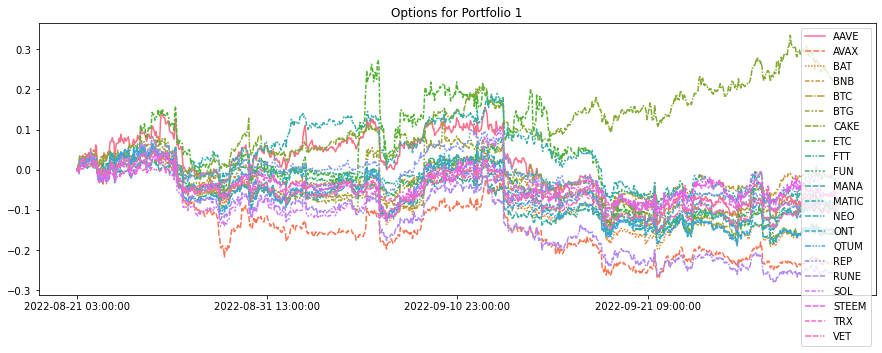

In [29]:
plot_tokens_history(data=df_change, title="Options for Portfolio 1", columns=tokens_op2)

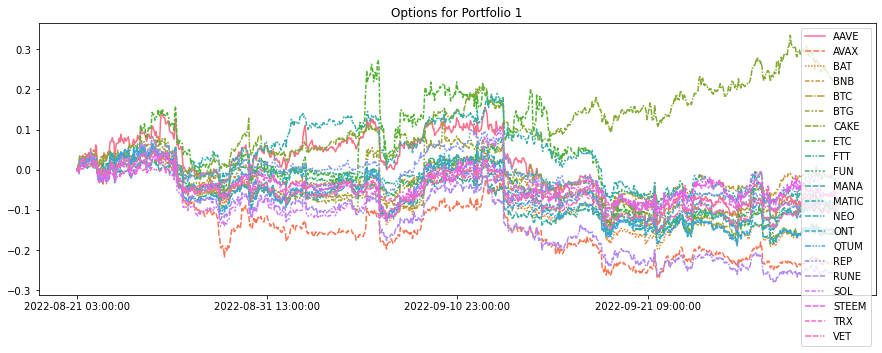

In [30]:
plot_tokens_history(data=df_change, title="Options for Portfolio 1", columns=tokens_op2)